This notebook takes the average of all searchterms' indivual normalized search data per sector.

In [4]:
import os

# Print all folders in the current directory
print("Folders in the current directory:")
for item in os.listdir('.'):
    if os.path.isdir(item):
        print(item)


Folders in the current directory:
.git
Search data clothes and fashion items
Search data consumer electronics
Search data food and drugstore items
Search data other non-food


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def process_csv_folder(folder):
    """
    Process all CSV files in the given folder, combine them into a single DataFrame,
    and save the result to a CSV file.

    Parameters:
        folder (str): The folder containing the CSV files to process.

    Returns:
        pd.DataFrame: The combined DataFrame.
    """
    # Initialize a list to collect all DataFrames
    dataframes = []

    for filename in os.listdir(folder):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder, filename)
            
            # Extract product name from filename (no extension)
            product_name = os.path.splitext(filename)[0]

            # Read the CSV, skip first row (with 'Categorie: ...'), and read second row as header
            df = pd.read_csv(filepath, skiprows=1)

            # Rename columns
            df.columns = ['Date', product_name]

            # Ensure 'Date' is kept as year-month only (string, not full datetime)
            df['Date'] = pd.to_datetime(df['Date']).dt.to_period('M').astype(str)

            # Set index to Date for joining
            df.set_index('Date', inplace=True)

            dataframes.append(df)

    # Merge all dataframes on the date index
    combined_df = pd.concat(dataframes, axis=1, join='inner')

    # Reset index to have 'Date' as first column
    combined_df.reset_index(inplace=True)

    # Add a column that contains the average search volume for each month
    combined_df['Average'] = combined_df.iloc[:, 1:].mean(axis=1)

    # Save to CSV
    output_filename = f"combined_{os.path.basename(folder)}.csv"
    combined_df.to_csv(output_filename, index=False)

    print(f"✅ Combined CSV saved as '{output_filename}'")

    # Print a plot of the average search volume per month
    sector_type = folder.split("Search Data ")[-1]
    combined_df.plot(x='Date', y='Average', title=f'Average Search Volume per Month - {sector_type}')
    plt.xlabel('Date')
    plt.ylabel('Average Search Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print a plot of the search volume for each product
    combined_df.plot(x='Date', title=f'Search Volume per Month - {sector_type}')
    plt.xlabel('Date')
    plt.ylabel('Search Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return


✅ Combined CSV saved as 'combined_Search data food and drugstore items.csv'


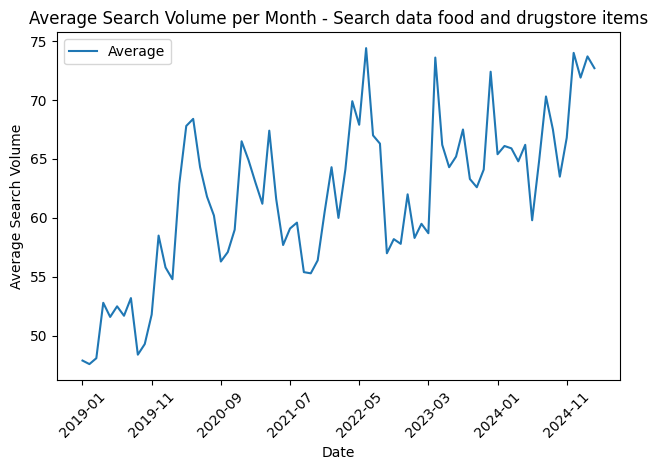

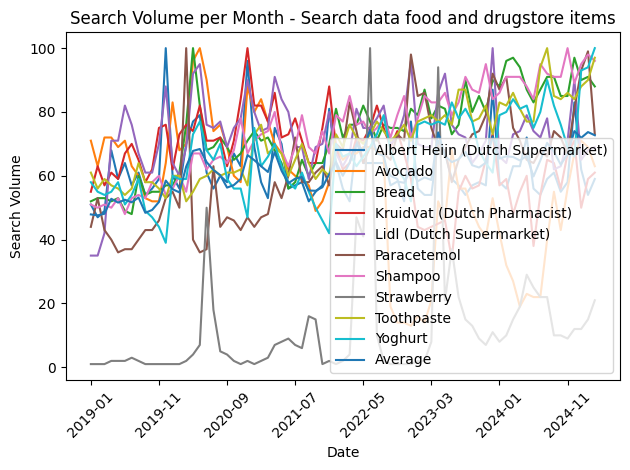

✅ Combined CSV saved as 'combined_Search data consumer electronics.csv'


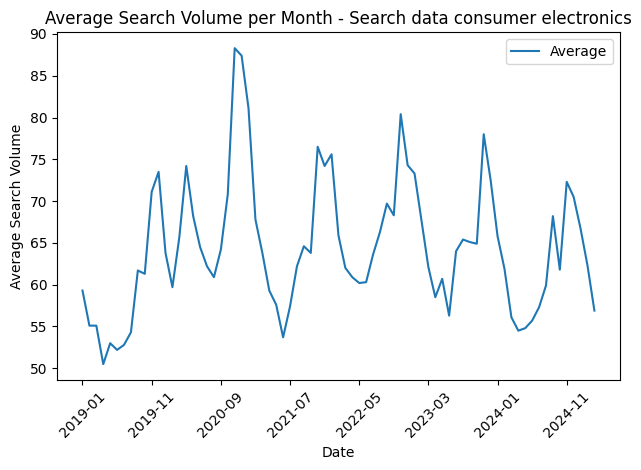

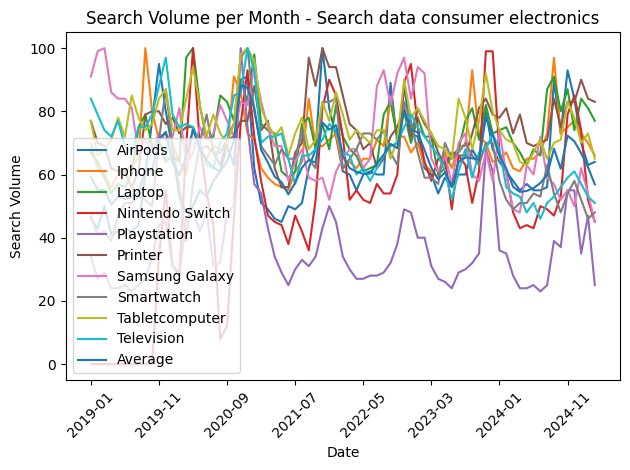

✅ Combined CSV saved as 'combined_Search data clothes and fashion items.csv'


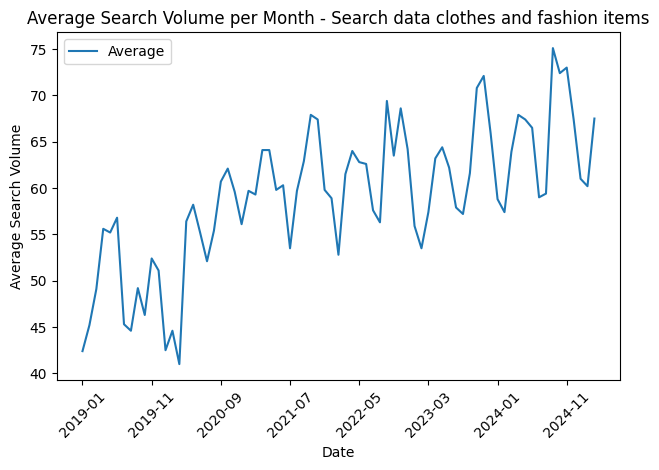

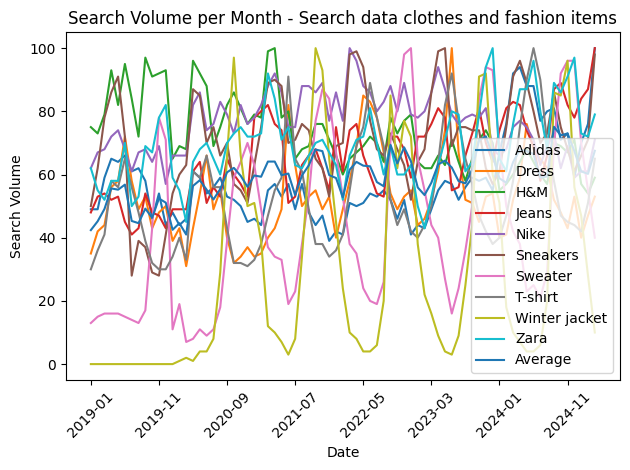

✅ Combined CSV saved as 'combined_Search data other non-food.csv'


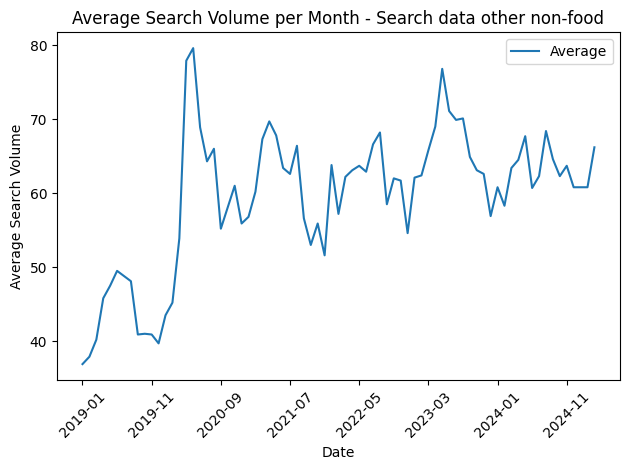

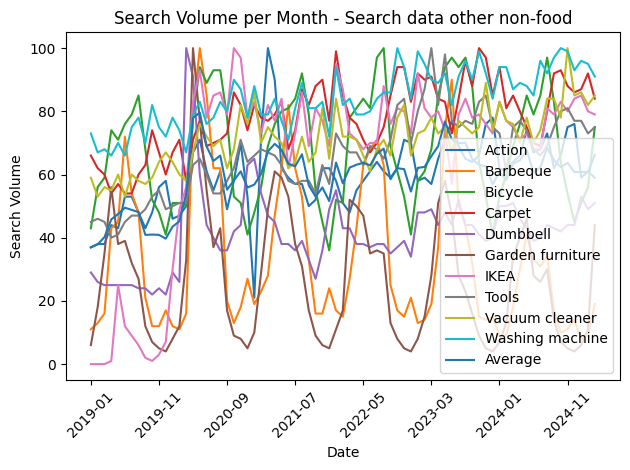

In [6]:
process_csv_folder('Search data food and drugstore items')
process_csv_folder('Search data consumer electronics')
process_csv_folder('Search data clothes and fashion items')
process_csv_folder('Search data other non-food')

In [8]:
# Print head of the combined DataFrame
def print_combined_head(folder):
    """
    Print the head of the combined DataFrame for the given folder.

    Parameters:
        folder (str): The folder containing the CSV files to process.
    """
    output_filename = f"combined_{os.path.basename(folder)}.csv"
    combined_df = pd.read_csv(output_filename)
    print(f"Head of '{output_filename}':")
    print(combined_df.head())

# Example
print_combined_head('Search data food and drugstore items')

Head of 'combined_Search data food and drugstore items.csv':
      Date  Albert Heijn (Dutch Supermarket)  Avocado  Bread  \
0  2019-01                                51       71     52   
1  2019-02                                47       63     53   
2  2019-03                                49       72     53   
3  2019-04                                68       72     52   
4  2019-05                                59       69     53   

   Kruidvat (Dutch Pharmacist)  Lidl (Dutch Supermarket)  Paracetemol  \
0                           55                        35           44   
1                           63                        35           53   
2                           57                        42           43   
3                           61                        71           40   
4                           59                        71           36   

   Shampoo  Strawberry  Toothpaste  Yoghurt  Average  
0       51           1          61       58     47.9  
1    

Check data quality (contradictions)

In [ ]:
# Place all sector search data filenames in a list (all files that start with "combined_")
sector_search_data_files = [f for f in os.listdir('.') if f.startswith("combined_") and f.endswith(".csv")]

warnings_found = False

# Check all sector search data files for empty values
for filename in sector_search_data_files:
    df = pd.read_csv(filename)
    if df.isnull().values.any():
        print(f"⚠️ Warning: {filename} contains empty values.")
        warnings_found = True

# Check all sector search data files for identical start and end dates
for filename in sector_search_data_files:
    df = pd.read_csv(filename)
    start_date = df['Date'].min()
    end_date = df['Date'].max()
    if start_date == end_date:
        print(f"⚠️ Warning: {filename} has identical start and end dates.")
        warnings_found = True

# Check for same amount of rows in all sector search data files
row_counts = {filename: len(pd.read_csv(filename)) for filename in sector_search_data_files}
if len(set(row_counts.values())) > 1:
    print("⚠️ Warning: Sector search data files have inconsistent row counts.")
    warnings_found = True

# Print a positive statement if no warnings were found
if not warnings_found:
    print("✅ All sector search data files passed the quality checks.")

✅ All sector search data files passed the quality checks.
